<h1>Done By - </h1>
<ul>
    <li>Aaditya Diwan - 323001</li>
    <li>Ankit Bawanthade - 323009</li>
    <li>Bhupendra Nagda - 323014</li>
    <li>Jayanth Thopil - 323019</li>
</ul>

Initially the dataset consisted of 13 columns, But Since <b>Station Code and Agency</b> wouldnn't have contributed to the visualization process, We removed them and made the dataset with 9 columns.<br> 

In [1]:
#Importing the required libraries.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset.csv')
df = dataset.copy()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [4]:
df['type'].nunique()

10

In [5]:
df['type'].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [6]:
df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
print("Null values of column State ", df['state'].isnull().sum() )
print("Null values of column location ", df['location'].isnull().sum() )
print("Null values of column so2 ", df['so2'].isnull().sum() )
print("Null values of column no2 ", df['no2'].isnull().sum() )
print("Null values of column rspm ", df['rspm'].isnull().sum() )
print("Null values of column spm ", df['spm'].isnull().sum() )
print("Null values of column pm_2.5 ", df['pm2_5'].isnull().sum() )
print("Null values of column date ", df['date'].isnull().sum() )

Null values of column State  0
Null values of column location  3
Null values of column so2  34646
Null values of column no2  16233
Null values of column rspm  40222
Null values of column spm  237387
Null values of column pm_2.5  426428
Null values of column date  7


<h1>Reading</h1>
<p>The following two lines are to get the information about the dataset i.e - The total number of attributes, their name,
non-null as well as null numbered values, etc.
The thing to note here is that the dataset is plagued with null entries which will make visualization of certain attributes 
unreasonable and useless.</p>

In [8]:
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/1990


    <h1>The main attributes are-</h1><br>1)<b>SO2</b>-So2 is the funndamental cause for acid rain. It causes various diseases in humans too and has adverse effects too. Main causes are Burning fuels, industrial areas, etc.<br><br>
2)<b>NO2</b> - Similar to SO2 it has adverse effects. Main contributors are vehicles.<br><br>
3)<b>pm2.5</b> - They are called particulate matter. They have a diameter of less than 2.5 micrometer they are the most dangerous in all. Since very small, can't be seen and can cause various cardiovascular diseases depending on exposure. They are emmited by factories, industries,etc <br><br>
4)<b>rspm</b> - They are called as residual particulate matter or also as pm10 i.e they have diameter of roughly less than 10 micrometer. they are less hazardous than pm2.5 but hazardous nonetheless. Emmited by factories,etc<br><br>
5)<b>type </b>- It tells us about the area. i.e whether Industrial, Residential Rural, etc <br><br>

In [9]:
#Here, Uttarnchal is replaced by Uttarakhand because, officialy, Uttaranchal was renamed as Uttarakhand.
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [10]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [11]:
"""
It is apparent by looking at the types that we can categorize them in two main types
Industrial and Residential
Others are redundant.
"""
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [12]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

<h1>Dealing with Null values</h1>
<p>For the case of simplicity, the null values are just removed entirely. But, we can devise other methods to deal with null values such as replacing them with previous values, etc</p>
    

In [13]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

<p>Just for the sake of visualization, we don't need the following attributes<br> The <b>Agency</b> is the comapny which measures the measurements, this will not affect anything.<br> The <b>location monitoring system</b> doesn't play any role in pollution.<br> The <b>Stn_code</b> and <b>sampling date</b> are of no use either.</p>

In [14]:
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [15]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [16]:
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

<h1>As mentioned above, We can remove the redundant types and get only 2 main</h1>

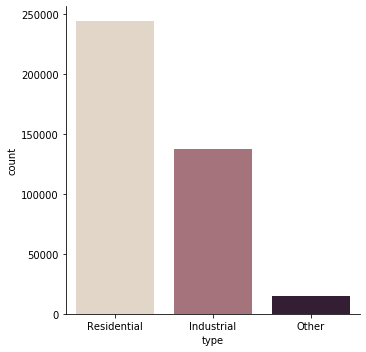

In [17]:
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

<h1>Main graphs</h1>
<p>Following graphs are the mean values of attributes related with their particular states.</p>

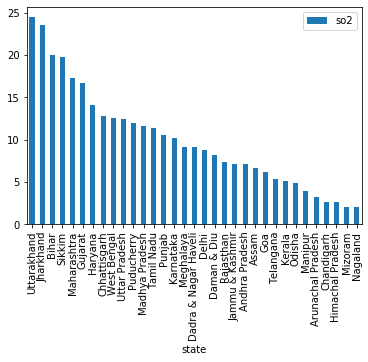

In [18]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).mean().sort_values("so2", ascending = False).plot.bar()

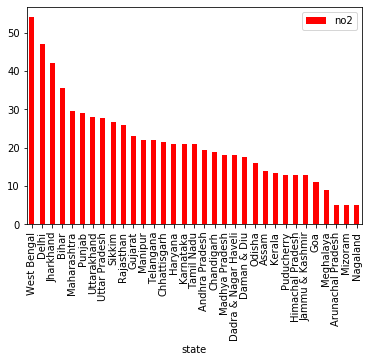

In [19]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

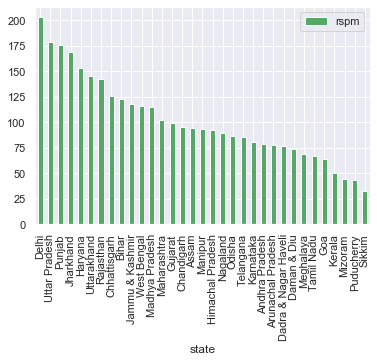

In [125]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).mean().sort_values("rspm", ascending = False).plot.bar(color = 'g')

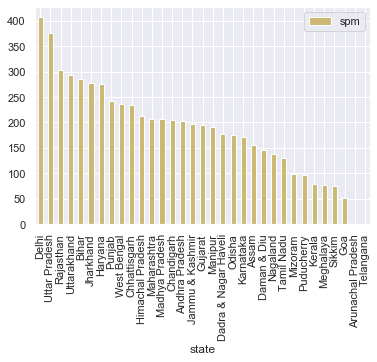

In [127]:
# spm
df[['spm', 'state']].groupby(['state']).mean().sort_values("spm", ascending = False).plot.bar(color = 'y')

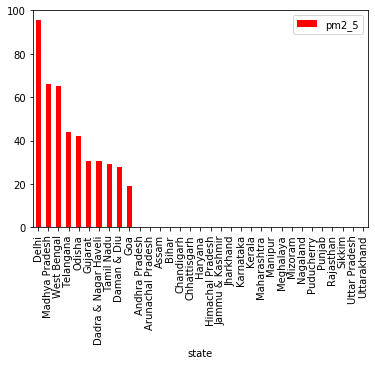

In [22]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).mean().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


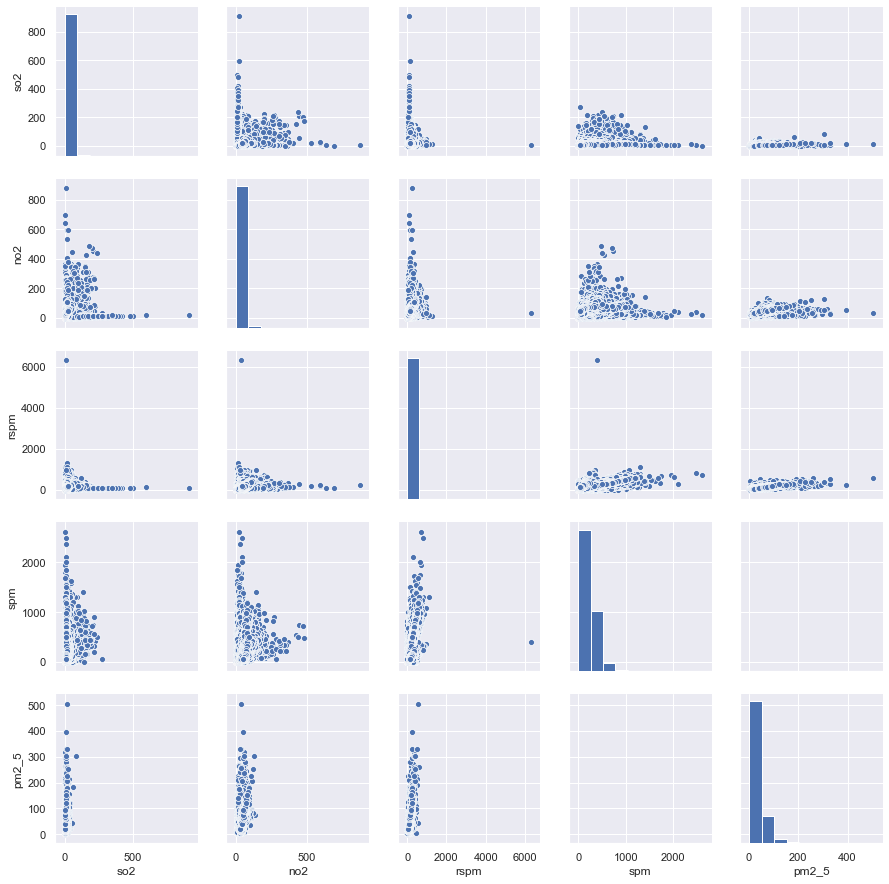

In [23]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

<h1>Co-relation</h1><br>
<p>The folloing graphs show relationship of each attribute with every other attribute via scatter plot. Scatter plot is choosen because it would give relationship between two attributes for corelation.</p>
<p>It should be expected that, as <b>pm2.5</b> as ubiquitous null values, It shouln't be considered as to be delivering proper insights on corelation</p><br>
<p>From the following graphs, it can be deduced that <b>so2</b> and <b>no2</b> values are highly concentrated near to the origin, which means that both are low for most of the observations.
We can see that no2 and so2 have a somewhat similar pattern with other features.</p><br>
<p>It can be said that <b>spm</b> and <b>rspm</b> share somewhat linear relationship, rest all features are not entirely related.</p>

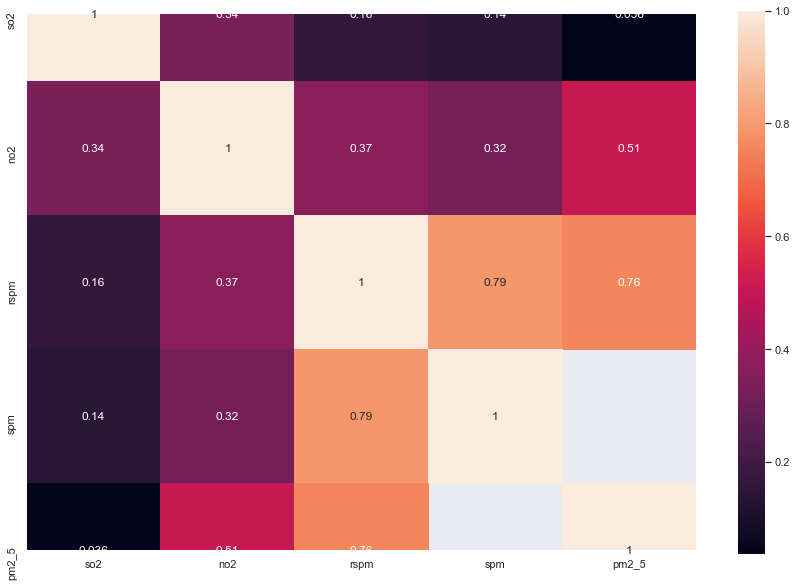

In [24]:
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, annot = True, square = True)

<p>It can be deduced from the correlation matrix that spm and rspm have high corelation which was shown in the above graphs as well.<p>

In [25]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [26]:
"""
Creating a seperate dataframe for Andhra Pradesh having all the properties

"""
df_andhra = df.iloc[0:25086,:]

In [27]:
len(df_andhra)

25086

In [28]:
df_andhra.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,Residential,6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,Residential,5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,Industrial,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,Residential,4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,Industrial,4.0,8.9,NaN,NaN,NaN,5/1/1990


In [29]:
df_andhra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25086 entries, 0 to 26367
Data columns (total 9 columns):
state       25086 non-null object
location    25086 non-null object
type        25086 non-null object
so2         25086 non-null float64
no2         25063 non-null float64
rspm        24629 non-null float64
spm         11030 non-null float64
pm2_5       0 non-null float64
date        25086 non-null object
dtypes: float64(5), object(4)
memory usage: 1.9+ MB


In [30]:
"""
Dropping pm2_5 as it has no non-null value
"""
df_andhra.drop('pm2_5', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df_andhra.tail(10)

,state,location,type,so2,no2,rspm,spm,date
26358,Andhra Pradesh,Rajahmundry,Industrial,7.0,21.0,72.0,NaN,11/25/2015
26359,Andhra Pradesh,Rajahmundry,Industrial,6.0,15.0,74.0,NaN,12/1/2015
26360,Andhra Pradesh,Rajahmundry,Industrial,7.0,17.0,62.0,NaN,12/4/2015
26361,Andhra Pradesh,Rajahmundry,Industrial,7.0,16.0,65.0,NaN,12/7/2015
26362,Andhra Pradesh,Rajahmundry,Industrial,8.0,18.0,70.0,NaN,12/10/2015
26363,Andhra Pradesh,Rajahmundry,Industrial,7.0,13.0,71.0,NaN,12/13/2015
26364,Andhra Pradesh,Rajahmundry,Industrial,7.0,18.0,77.0,NaN,12/16/2015
26365,Andhra Pradesh,Rajahmundry,Industrial,8.0,23.0,64.0,NaN,12/19/2015
26366,Andhra Pradesh,Rajahmundry,Industrial,7.0,19.0,61.0,NaN,12/22/2015
26367,Andhra Pradesh,Rajahmundry,Industrial,6.0,17.0,71.0,NaN,12/25/2015


In [32]:
"""
Replacing the null values in rspm by the mean
"""
df_andhra['rspm'].fillna(df_andhra['rspm'].mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
"""
Replacing the null values in spm by the mean
"""
df_andhra['spm'].fillna(df_andhra['spm'].mean(), inplace = True)

In [34]:
df_andhra.head(10)

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,78.20071,202.379112,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,78.20071,202.379112,2/1/1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,78.20071,202.379112,2/1/1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,78.20071,202.379112,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,78.20071,202.379112,3/1/1990
5,Andhra Pradesh,Hyderabad,Residential,6.4,25.7,78.20071,202.379112,3/1/1990
6,Andhra Pradesh,Hyderabad,Residential,5.4,17.1,78.20071,202.379112,4/1/1990
7,Andhra Pradesh,Hyderabad,Industrial,4.7,8.7,78.20071,202.379112,4/1/1990
8,Andhra Pradesh,Hyderabad,Residential,4.2,23.0,78.20071,202.379112,4/1/1990
9,Andhra Pradesh,Hyderabad,Industrial,4.0,8.9,78.20071,202.379112,5/1/1990


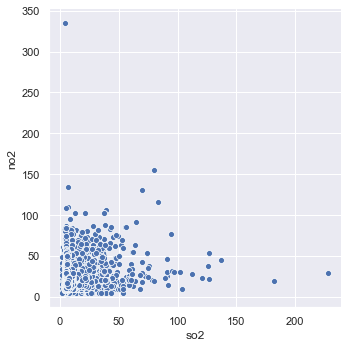

In [35]:
sns.relplot(y="no2", x="so2",
            data=df_andhra);

In [36]:
"""
Changing the format of the date column in df_andhra to datetime format 
for the ease of calculation and further process
"""
df_andhra['date'] = pd.to_datetime(df_andhra['date'], format = "%m/%d/%Y")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [37]:
df_andhra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25086 entries, 0 to 26367
Data columns (total 8 columns):
state       25086 non-null object
location    25086 non-null object
type        25086 non-null object
so2         25086 non-null float64
no2         25063 non-null float64
rspm        25086 non-null float64
spm         25086 non-null float64
date        25086 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.7+ MB


In [38]:
"""
Setting date as the index of df_andhra dataframe
"""
df_andhra.set_index('date', inplace = True)

In [39]:
df_andhra.head(10)

,state,location,type,so2,no2,rspm,spm
date,,,,,,,
1990-02-01,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,78.20071,202.379112
1990-02-01,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,78.20071,202.379112
1990-02-01,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,78.20071,202.379112
1990-03-01,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,78.20071,202.379112
1990-03-01,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,78.20071,202.379112
1990-03-01,Andhra Pradesh,Hyderabad,Residential,6.4,25.7,78.20071,202.379112
1990-04-01,Andhra Pradesh,Hyderabad,Residential,5.4,17.1,78.20071,202.379112
1990-04-01,Andhra Pradesh,Hyderabad,Industrial,4.7,8.7,78.20071,202.379112
1990-04-01,Andhra Pradesh,Hyderabad,Residential,4.2,23.0,78.20071,202.379112


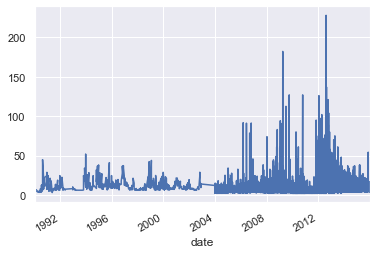

In [40]:
df_andhra['so2'].plot(grid = True, kind = 'line')

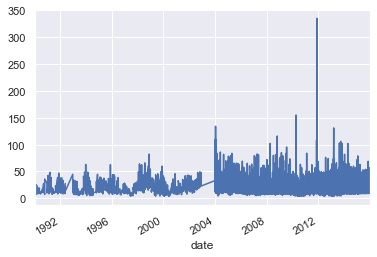

In [41]:
df_andhra['no2'].plot(grid = True, kind = 'line')

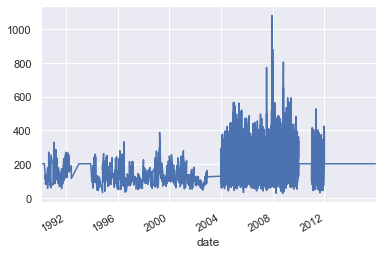

In [42]:
df_andhra['spm'].plot(grid = True, kind = 'line')

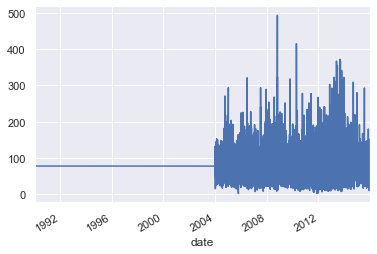

In [43]:
df_andhra['rspm'].plot(grid = True, kind = 'line')

In [44]:
df_andhra.head()

,state,location,type,so2,no2,rspm,spm
date,,,,,,,
1990-02-01,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,78.20071,202.379112
1990-02-01,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,78.20071,202.379112
1990-02-01,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,78.20071,202.379112
1990-03-01,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,78.20071,202.379112
1990-03-01,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,78.20071,202.379112


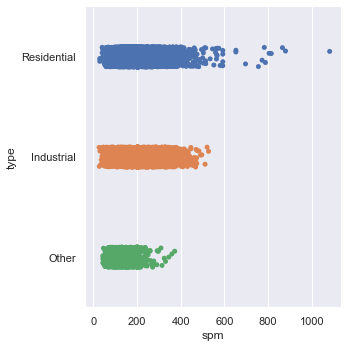

In [45]:
sns.catplot(x = 'spm', y = 'type', data = df_andhra)

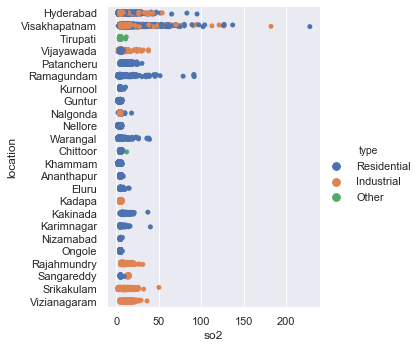

In [46]:
sns.catplot(x = 'so2', y = 'location',hue = 'type' ,data = df_andhra)

In [47]:
df_andhra.drop('state',axis = 1, inplace = True)

In [48]:
df_andhra.head()

,location,type,so2,no2,rspm,spm
date,,,,,,
1990-02-01,Hyderabad,Residential,4.8,17.4,78.20071,202.379112
1990-02-01,Hyderabad,Industrial,3.1,7.0,78.20071,202.379112
1990-02-01,Hyderabad,Residential,6.2,28.5,78.20071,202.379112
1990-03-01,Hyderabad,Residential,6.3,14.7,78.20071,202.379112
1990-03-01,Hyderabad,Industrial,4.7,7.5,78.20071,202.379112


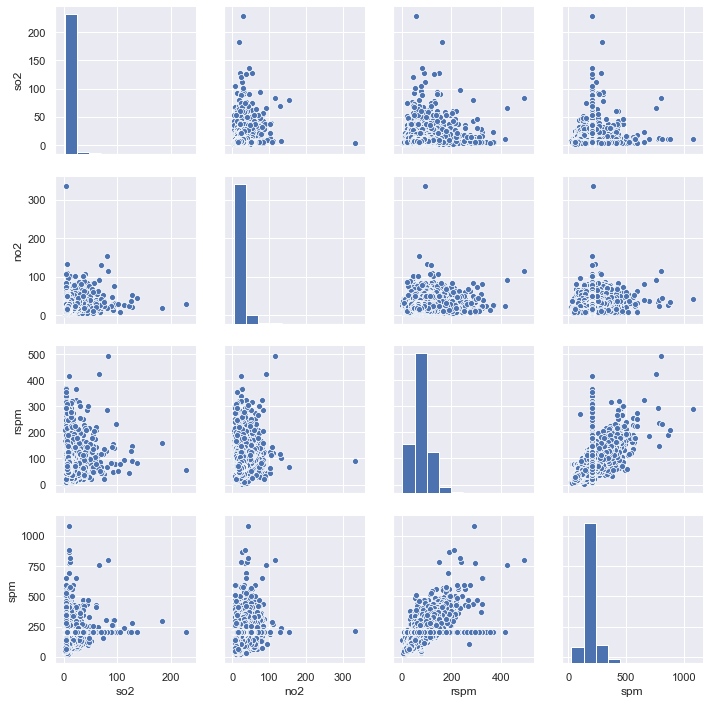

In [49]:
sns.pairplot(df_andhra)

In [50]:
"""
Encoding the data into numerical format as :
1 - ML models need data to be in numercial format
"""
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_andhra:
    # Compare if the dtype is object
    if df_andhra[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df_andhra[col]=le.fit_transform(df_andhra[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [51]:
df_andhra

,location,type,so2,no2,rspm,spm
date,,,,,,
1990-02-01,4,2,4.8,17.4,78.20071,202.379112
1990-02-01,4,0,3.1,7.0,78.20071,202.379112
1990-02-01,4,2,6.2,28.5,78.20071,202.379112
1990-03-01,4,2,6.3,14.7,78.20071,202.379112
1990-03-01,4,0,4.7,7.5,78.20071,202.379112
...,...,...,...,...,...,...
2015-12-13,15,0,7.0,13.0,71.00000,202.379112
2015-12-16,15,0,7.0,18.0,77.00000,202.379112
2015-12-19,15,0,8.0,23.0,64.00000,202.379112


In [52]:
"""
Creating seperate columns for encoded data
"""
from sklearn.preprocessing import OneHotEncoder

In [53]:
enc = OneHotEncoder(handle_unknown='ignore')

In [54]:
enc_df = pd.DataFrame(enc.fit_transform(df_andhra[['location']]).toarray())


In [55]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_andhra

,location,type,so2,no2,rspm,spm
date,,,,,,
1990-02-01,4,2,4.8,17.4,78.20071,202.379112
1990-02-01,4,0,3.1,7.0,78.20071,202.379112
1990-02-01,4,2,6.2,28.5,78.20071,202.379112
1990-03-01,4,2,6.3,14.7,78.20071,202.379112
1990-03-01,4,0,4.7,7.5,78.20071,202.379112
...,...,...,...,...,...,...
2015-12-13,15,0,7.0,13.0,71.00000,202.379112
2015-12-16,15,0,7.0,18.0,77.00000,202.379112
2015-12-19,15,0,8.0,23.0,64.00000,202.379112


In [57]:
x = df_andhra.index
enc_df['date'] = x

In [58]:
enc_df.set_index('date', inplace = True)

In [59]:
enc_df1 = pd.DataFrame(enc.fit_transform(df_andhra[['type']]).toarray())

In [60]:
enc_df1

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
25081,1.0,0.0,0.0
25082,1.0,0.0,0.0
25083,1.0,0.0,0.0
25084,1.0,0.0,0.0


In [61]:
y = df_andhra.index
enc_df1['date'] = y

In [62]:
enc_df1.set_index('date', inplace = True)

In [63]:
enc_df1.rename(columns = {0 : 'a', 1 : 'b', 2: 'c'}, inplace = True)

In [64]:
for i in range(0, 24):
    df_andhra[i] = enc_df[i]
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_andhra

,location,type,so2,no2,rspm,spm,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
1990-02-01,4,2,4.8,17.4,78.20071,202.379112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-02-01,4,0,3.1,7.0,78.20071,202.379112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-02-01,4,2,6.2,28.5,78.20071,202.379112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-03-01,4,2,6.3,14.7,78.20071,202.379112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990-03-01,4,0,4.7,7.5,78.20071,202.379112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-13,15,0,7.0,13.0,71.00000,202.379112,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-12-16,15,0,7.0,18.0,77.00000,202.379112,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-12-19,15,0,8.0,23.0,64.00000,202.379112,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


e

In [66]:
df_andhra['a'] = enc_df1['a']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_andhra['b'] = enc_df1['b']
df_andhra['c'] = enc_df1['c']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
df_andhra['no2'].isna().sum()
df_andhra['no2'].fillna(df_andhra['no2'].mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [69]:
df_andhra.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25086 entries, 1990-02-01 to 2015-12-25
Data columns (total 33 columns):
location    25086 non-null int32
type        25086 non-null int32
so2         25086 non-null float64
no2         25086 non-null float64
rspm        25086 non-null float64
spm         25086 non-null float64
0           25086 non-null float64
1           25086 non-null float64
2           25086 non-null float64
3           25086 non-null float64
4           25086 non-null float64
5           25086 non-null float64
6           25086 non-null float64
7           25086 non-null float64
8           25086 non-null float64
9           25086 non-null float64
10          25086 non-null float64
11          25086 non-null float64
12          25086 non-null float64
13          25086 non-null float64
14          25086 non-null float64
15          25086 non-null float64
16          25086 non-null float64
17          25086 non-null float64
18          25086 non-null float64
19 

In [70]:
df_andhra['no2'].isna().sum()

0

In [71]:
y = df_andhra.iloc[:, 2:3].values
df_andhra.reset_index()
y.reshape(1,-1)
df_andhra.drop('so2', axis = 1, inplace = True)
df_andhra.drop('location', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
X = df_andhra.values
y.shape

(25086, 1)

In [124]:
X.shape


(25086, 31)

In [73]:
y

array([[4.8],
       [3.1],
       [6.2],
       ...,
       [8. ],
       [7. ],
       [6. ]])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [76]:
X

array([[ 2.        , 17.4       , 78.20070973, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  7.        , 78.20070973, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.        , 28.5       , 78.20070973, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        , 23.        , 64.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , 19.        , 61.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , 17.        , 71.        , ...,  1.        ,
         0.        ,  0.        ]])

In [77]:
y

array([[4.8],
       [3.1],
       [6.2],
       ...,
       [8. ],
       [7. ],
       [6. ]])

In [78]:
y.shape

(25086, 1)

In [79]:
np.isfinite(X.all()) 

True

In [80]:
np.any(np.isnan(X))

False

In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [82]:
X_train

array([[ 0.7654495 , -0.45403568,  0.13893762, ..., -0.60006777,
        -0.39428202,  0.81529347],
       [ 0.7654495 ,  0.06788733, -1.68510909, ..., -0.60006777,
        -0.39428202,  0.81529347],
       [-0.38726253, -1.13161993, -0.81651542, ..., -0.60006777,
         2.53625562, -1.2265522 ],
       ...,
       [ 0.7654495 , -1.31475081,  0.68904694, ..., -0.60006777,
        -0.39428202,  0.81529347],
       [ 0.7654495 ,  1.1666726 ,  2.36832804, ..., -0.60006777,
        -0.39428202,  0.81529347],
       [ 0.7654495 ,  0.44330563,  1.21020314, ..., -0.60006777,
        -0.39428202,  0.81529347]])

In [83]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [84]:
y_train

array([[-0.39841891],
       [-0.49559107],
       [ 6.46841342],
       ...,
       [-0.33363747],
       [ 2.92162974],
       [-0.2850514 ]])

In [85]:
np.any(np.isnan(X))

False

In [114]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [115]:
y_pred = regressor.predict(X_test)


In [116]:
predictor = regressor.predict(X_train)

In [117]:
y_pred
len(y_pred)
len(y_train)

20068

In [118]:
print(len(y_pred))
print(len(y_test))

5018
5018


In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.15743875150554376

In [120]:
y_pred = sc_y.inverse_transform(y_pred)